Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

In [1]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
cf.go_offline()
from plotly.subplots import make_subplots

# pd.set_option("display.max_colwidth", 150)
# pd.set_option("display.min_rows", 20)

import matplotlib
# matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)
import plotly.express as px

import plotly.graph_objects as go

# import plotly.io as pio
# pio.renderers.default = 'png'  ## comentar se quiser grafico interativo

In [2]:
def busca_titulos(tipo=None):
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  if tipo is None:
    return df.sort_index()
  else:
      return df[df.index.get_level_values(0) == tipo]

busca por tipo

In [3]:
busca_titulos('Tesouro Selic')

Taxa Compra Manha  Taxa Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                         
Tesouro Selic 2013-03-07      2009-06-12                0.0              0.04   
              2010-03-17      2009-06-12                0.0              0.01   
              2011-03-16      2009-06-12                0.0              0.02   
              2014-03-07      2009-06-12                0.0              0.04   
              2012-03-07      2009-06-12                0.0              0.03   
...                                                     ...               ...   
              2011-03-16      2010-03-15                0.0              0.02   
              2010-03-17      2010-03-15                0.0              0.01   
              2013-03-07      2010-03-12                0.0              0.03   
              2010-03-17      2010-03-12                0.0              0.01   
              2011-03-16      2010-03-12                0.0              0.02   

                                          PU Compra Manha  PU Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                     
Tesouro Selic 2013-03-07      2009-06-12          3912.22         3906.41   
              2010-03-17      2009-06-12          3912.22         3911.92   
              2011-03-16      2009-06-12          3912.22         3910.85   
              2014-03-07      2009-06-12          3912.22         3904.84   
              2012-03-07      2009-06-12          3912.22         3909.02   
...                                                   ...             ...   
              2011-03-16      2010-03-15          4165.55         4164.72   
              2010-03-17      2010-03-15          4165.55         4165.54   
              2013-03-07      2010-03-12          4164.18         4160.46   
              2010-03-17      2010-03-12          4164.18         4164.17   
              2011-03-16      2010-03-12          4164.18         4163.34   

                                          PU Base Manha  
Tipo Titulo   Data Vencimento Data Base                  
Tesouro Selic 2013-03-07      2009-06-12        3905.03  
              2010-03-17      2009-06-12        3910.55  
              2011-03-16      2009-06-12        3909.47  
              2014-03-07      2009-06-12        3903.46  
              2012-03-07      2009-06-12        3907.64  
...                                                 ...  
              2011-03-16      2010-03-15        4163.33  
              2010-03-17      2010-03-15        4164.16  
              2013-03-07      2010-03-12        4159.07  
              2010-03-17      2010-03-12        4162.78  
              2011-03-16      2010-03-12        4161.95  

[20668 rows x 5 columns]

busca todos

In [4]:
titulos = busca_titulos()
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
...                                                      ...   
Tesouro Selic  2031-03-01      2026-01-05               0.10   
                               2026-01-06               0.10   
                               2026-01-07               0.10   
                               2026-01-08               0.10   
                               2026-01-09               0.10   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
...                                                     ...              ...   
Tesouro Selic  2031-03-01      2026-01-05              0.11         18022.57   
                               2026-01-06              0.11         18032.58   
                               2026-01-07              0.11         18043.05   
                               2026-01-08              0.11         18053.36   
                               2026-01-09              0.11         18063.38   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
...                                                   ...            ...  
Tesouro Selic  2031-03-01      2026-01-05        18003.31       18003.31  
                               2026-01-06        18013.32       18013.32  
                               2026-01-07        18023.78       18023.78  
                               2026-01-08        18034.08       18034.08  
                               2026-01-09        18044.09       18044.09  

[166085 rows x 5 columns]

tipos

In [5]:
titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

In [6]:
busca_titulos('Tesouro IPCA+ com Juros Semestrais')

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2010-08-15      2009-06-12               5.14   
                                   2045-05-15      2009-06-12               6.51   
                                   2035-05-15      2009-06-12               6.56   
                                   2024-08-15      2009-06-12               6.60   
                                   2020-08-15      2009-06-12               6.60   
...                                                                          ...   
                                   2010-08-15      2010-03-15               4.21   
                                   2020-08-15      2010-03-15               6.56   
                                   2045-05-15      2010-03-15               6.32   
                                   2035-05-15      2010-03-15               6.33   
                                   2024-08-15      2010-03-15               6.34   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2010-08-15      2009-06-12              5.16   
                                   2045-05-15      2009-06-12              6.61   
                                   2035-05-15      2009-06-12              6.66   
                                   2024-08-15      2009-06-12              6.68   
                                   2020-08-15      2009-06-12              6.68   
...                                                                         ...   
                                   2010-08-15      2010-03-15              4.23   
                                   2020-08-15      2010-03-15              6.64   
                                   2045-05-15      2010-03-15              6.42   
                                   2035-05-15      2010-03-15              6.43   
                                   2024-08-15      2010-03-15              6.42   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2010-08-15      2009-06-12          1883.73   
                                   2045-05-15      2009-06-12          1717.49   
                                   2035-05-15      2009-06-12          1719.47   
                                   2024-08-15      2009-06-12          1767.62   
                                   2020-08-15      2009-06-12          1784.76   
...                                                                        ...   
                                   2010-08-15      2010-03-15          1920.35   
                                   2020-08-15      2010-03-15          1831.49   
                                   2045-05-15      2010-03-15          1856.04   
                                   2035-05-15      2010-03-15          1862.66   
                                   2024-08-15      2010-03-15          1850.90   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2010-08-15      2009-06-12         1883.33   
                                   2045-05-15      2009-06-12         1694.32   
                                   2035-05-15      2009-06-12         1698.61   
                                   2024-08-15      2009-06-12         1754.63   
                                   2020-08-15      2009-06-12         1773.99   
...                                                                       ...   
                                   2010-08-15      2010-03-15         1920.20   
                                   2020-08-15      2010-03-15         1820.80   
             

historico das taxas do tesouro  IPCA+ com Juros Semestrai 2035

In [7]:
titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')]

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12               8.04   
                                                   2006-04-13               8.05   
                                                   2006-04-17               8.09   
                                                   2006-04-18               8.10   
                                                   2006-04-19               8.09   
...                                                                          ...   
                                                   2026-01-05               7.32   
                                                   2026-01-06               7.43   
                                                   2026-01-07               7.50   
                                                   2026-01-08               7.51   
                                                   2026-01-09               7.50   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12              8.14   
                                                   2006-04-13              8.15   
                                                   2006-04-17              8.19   
                                                   2006-04-18              8.20   
                                                   2006-04-19              8.19   
...                                                                         ...   
                                                   2026-01-05              7.44   
                                                   2026-01-06              7.55   
                                                   2026-01-07              7.62   
                                                   2026-01-08              7.63   
                                                   2026-01-09              7.62   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12          1279.73   
                                                   2006-04-13          1279.30   
                                                   2006-04-17          1274.17   
                                                   2006-04-18          1273.27   
                                                   2006-04-19          1275.19   
...                                                                        ...   
                                                   2026-01-05          4240.89   
                                                   2026-01-06          4211.85   
                                                   2026-01-07          4194.13   
                                                   2026-01-08          4193.03   
                                                   2026-01-09          4198.00   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12         1265.68   
                                                   2006-04-13         1265.27   
                                                   2006-04-17         1260.24   
                                                   2006-04-18         1259.37   
                                                   2006-04-19         1261.26   
...                                                                       ...   
                                                   2026-01-05         4205.75   
                                                   2026-01-06         4177.03   
             

In [8]:
hist = titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')].reset_index(level=[0, 1], drop=True)
hist

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2006-04-12               8.04              8.14          1279.73   
2006-04-13               8.05              8.15          1279.30   
2006-04-17               8.09              8.19          1274.17   
2006-04-18               8.10              8.20          1273.27   
2006-04-19               8.09              8.19          1275.19   
...                       ...               ...              ...   
2026-01-05               7.32              7.44          4240.89   
2026-01-06               7.43              7.55          4211.85   
2026-01-07               7.50              7.62          4194.13   
2026-01-08               7.51              7.63          4193.03   
2026-01-09               7.50              7.62          4198.00   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2006-04-12         1265.68        1265.11  
2006-04-13         1265.27        1264.40  
2006-04-17         1260.24        1259.73  
2006-04-18         1259.37        1258.86  
2006-04-19         1261.26        1260.75  
...                    ...            ...  
2026-01-05         4205.75        4205.75  
2026-01-06         4177.03        4177.03  
2026-01-07         4159.52        4159.52  
2026-01-08         4158.46        4158.46  
2026-01-09         4162.52        4162.52  

[4926 rows x 5 columns]

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=hist.index , y=hist['Taxa Compra Manha']))
fig.update_layout(
    title="Historico da taxa ntnb 2035",
    xaxis_title="Ano",
    yaxis_title="Taxa compra",
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=100, b=100),
    paper_bgcolor="LightYellow"
)
fig.show()

Vendas de titulos do tesouro

In [10]:
def vendas_tesouro(tipo=None):
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  if tipo is None:
    return df
  else:
    return df[df.index.get_level_values(0) == tipo]


In [11]:
vendas = vendas_tesouro()
vendas


PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
...                                                      ...         ...   
Tesouro Selic  2031-03-01           2026-01-02  18002.443955     9758.77   
                                    2026-01-05  18012.562039    12433.78   
                                    2026-01-06  18022.562062    12612.54   
                                    2026-01-07  18032.572258     7967.71   
                                    2026-01-08  18043.044214     6685.20   

                                                       Valor  
Tipo Titulo    Vencimento do Titulo Data Venda                
Tesouro Educa+ 2030-12-15           2023-08-02  1.077899e+06  
                                    2023-08-03  5.962986e+05  
                                    2023-08-04  5.134184e+05  
                                    2023-08-07  1.176050e+06  
                                    2023-08-08  7.434543e+05  
...                                                      ...  
Tesouro Selic  2031-03-01           2026-01-02  1.756817e+08  
                                    2026-01-05  2.239642e+08  
                                    2026-01-06  2.273103e+08  
                                    2026-01-07  1.436783e+08  
                                    2026-01-08  1.206214e+08  

[94300 rows x 3 columns]

In [12]:
selic= vendas_tesouro('Tesouro Selic').reset_index(level=[0, 1], drop=True)

In [13]:
selic

PU  Quantidade         Valor
Data Venda                                        
2002-01-07   1263.007692        2.60  3.283810e+03
2002-01-08   1263.900000        7.60  9.605640e+03
2002-01-09   1264.790000        6.00  7.588740e+03
2002-01-11   1266.821052        3.80  4.813910e+03
2002-01-14   1267.707500        4.00  5.070830e+03
...                  ...         ...           ...
2026-01-02  18002.443955     9758.77  1.756817e+08
2026-01-05  18012.562039    12433.78  2.239642e+08
2026-01-06  18022.562062    12612.54  2.273103e+08
2026-01-07  18032.572258     7967.71  1.436783e+08
2026-01-08  18043.044214     6685.20  1.206214e+08

[10149 rows x 3 columns]

In [14]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("PU", "Valor" , 'Quantidade'))

# Adicionando os traces aos subplots
fig.add_trace(go.Scatter(x=selic.index, y=selic['PU'], mode='lines', name='Dados 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Quantidade'], mode='lines', name='Dados 2'), row=2, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Valor'], mode='lines', name='Dados 2'), row=3, col=1)

# Configurando o layout
fig.update_layout(title="Vendas do Tesouro Selic", showlegend=False)



<Axes: xlabel='Data Venda'>

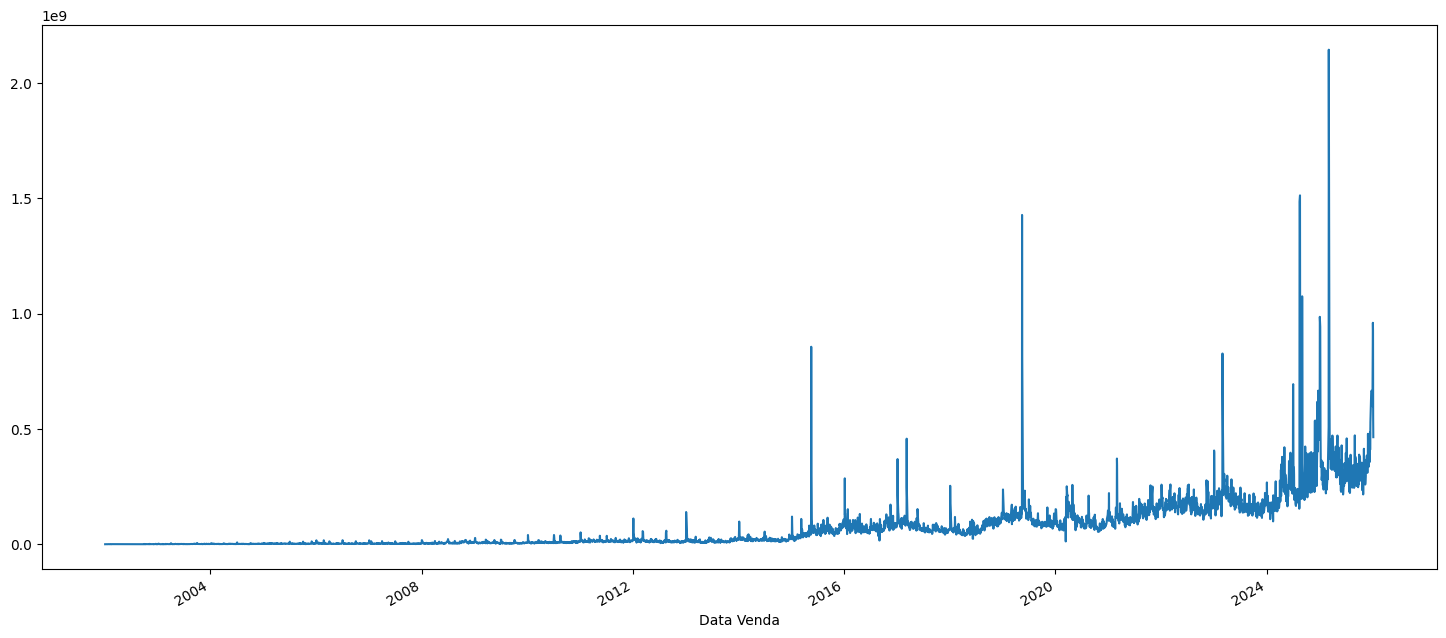

In [15]:
vendas['Valor'].groupby('Data Venda').sum().plot()

recompra -- títulos resgatados antes do vencimento

In [16]:
def recompras():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :2])
  df = df.set_index(multi_indice).iloc[: , 2:]  
  return df.sort_index()

In [17]:
resgate = recompras()
resgate

Data Resgate  Quantidade       Valor
Tipo Titulo    Vencimento do Titulo                                     
Tesouro Educa+ 2030-12-15             2025-07-18       72.67   262323.73
               2030-12-15             2025-07-21      207.70   749874.04
               2030-12-15             2025-06-05       91.84   330649.59
               2030-12-15             2025-06-20      193.88   698494.30
               2030-12-15             2025-07-03       62.83   227732.42
...                                          ...         ...         ...
Tesouro Selic  2031-03-01             2025-02-12       62.99  1002469.50
               2031-03-01             2025-03-07      299.85  4809871.49
               2031-03-01             2025-02-27      275.67  4412817.90
               2031-03-01             2025-03-14      425.91  6849848.91
               2031-03-01             2025-03-17      445.76  7172619.20

[91295 rows x 3 columns]

In [18]:
selic = resgate.loc['Tesouro Selic']
selic

Data Resgate  Quantidade       Valor
Vencimento do Titulo                                     
2005-02-16             2005-02-10       24.00    52800.48
2005-02-16             2005-01-06       10.60    22969.46
2005-02-16             2005-01-07       19.60    42499.46
2005-02-16             2005-01-13      128.40   279139.02
2005-02-16             2005-01-20       20.60    44929.63
...                           ...         ...         ...
2031-03-01             2025-02-12       62.99  1002469.50
2031-03-01             2025-03-07      299.85  4809871.49
2031-03-01             2025-02-27      275.67  4412817.90
2031-03-01             2025-03-14      425.91  6849848.91
2031-03-01             2025-03-17      445.76  7172619.20

[10578 rows x 3 columns]

<Axes: xlabel='Data Resgate'>

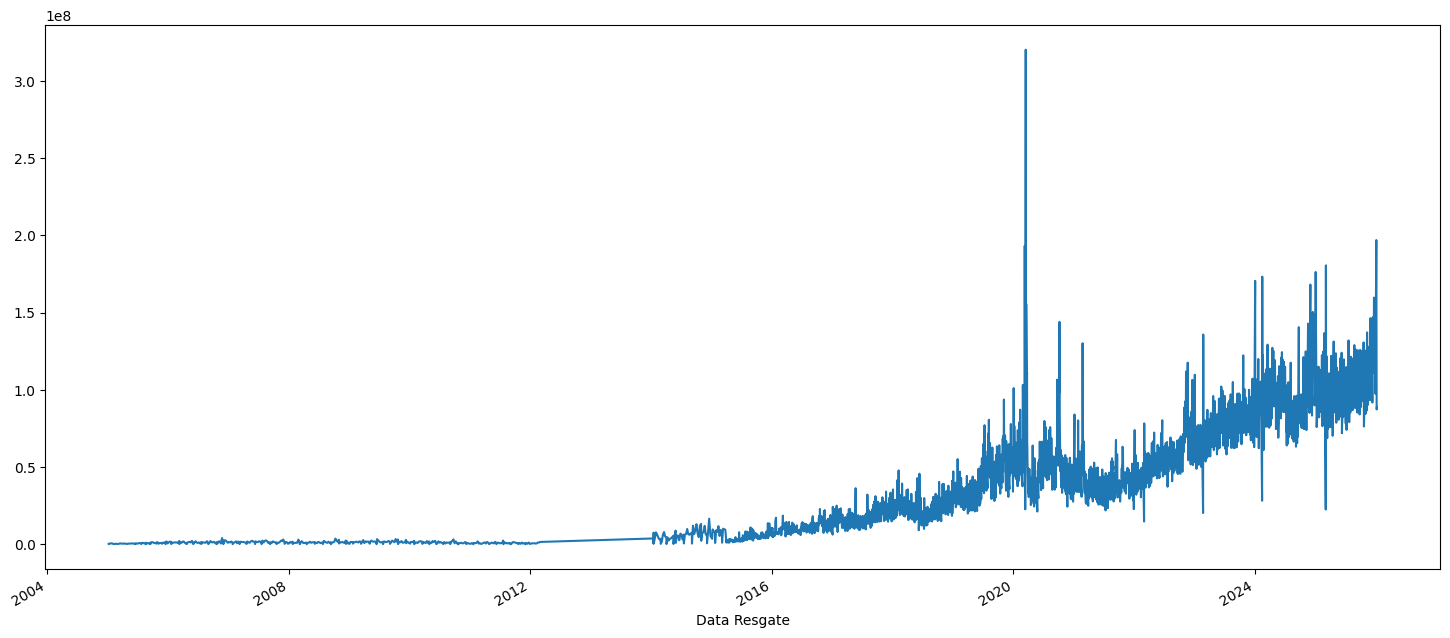

In [19]:
selic.groupby('Data Resgate').sum().Valor.plot()

Venda semanal Tesouro Selic X retorno Ibov

In [20]:
selic_semanal = selic.reset_index(level=[0], drop=True)
selic_semanal.set_index('Data Resgate', inplace=True)
selic_semanal = selic_semanal.resample('W').sum()
selic_semanal

Quantidade         Valor
Data Resgate                          
2005-01-09        109.40  2.363506e+05
2005-01-16        203.40  4.414528e+05
2005-01-23        263.60  5.713181e+05
2005-01-30        238.80  5.209024e+05
2005-02-06         83.00  1.814714e+05
...                  ...           ...
2025-12-14      32482.05  5.812609e+08
2025-12-21      34688.57  6.224873e+08
2025-12-28      22588.87  4.063940e+08
2026-01-04      13126.49  2.365721e+08
2026-01-11      27229.27  4.919777e+08

[1097 rows x 2 columns]

In [21]:
ibov = yf.download('^BVSP')['Close'].resample('W').last().pct_change()[1:]

/tmp/ipykernel_23798/91363168.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [22]:
selic_ibov = pd.concat([selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

Recompra(%)   IBOV(%)
2025-12-28    -0.347145  0.015296
2026-01-04    -0.417875 -0.002225
2026-01-11     1.079610  0.017634

In [23]:
selic_ibov = selic_ibov[selic_ibov.index >'2022']

fig = go.Figure()
fig.add_trace(go.Scatter(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Scatter(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     

In [24]:

fig = go.Figure()
fig.add_trace(go.Bar(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     